In [2]:
import pandas as pd
import os
import seaborn as sns
import warnings
import scipy as sp

In [3]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
# Specify the directory path
directory = "air_quality"

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith(".csv")]

# Initialize an empty dataframe
air_quality = pd.DataFrame()

# Iterate over each CSV file and concatenate them
for file in csv_files:
    file_path = os.path.join(directory, file)
    temp_df = pd.read_csv(file_path)
    air_quality = pd.concat([air_quality, temp_df])

# Print the concatenated dataframe
air_quality


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [10]:
each_pollution = air_quality[['PM2.5','PM10','NO2','CO','SO2','O3']].copy()
each_pollution = each_pollution.dropna()
each_pollution

,PM2.5,PM10,NO2,CO,SO2,O3
0,4.0,4.0,7.0,300.0,4.0,77.0
1,8.0,8.0,7.0,300.0,4.0,77.0
2,7.0,7.0,10.0,300.0,5.0,73.0
3,6.0,6.0,11.0,300.0,11.0,72.0
4,3.0,3.0,12.0,300.0,12.0,72.0
...,...,...,...,...,...,...
35059,11.0,32.0,24.0,400.0,3.0,72.0
35060,13.0,32.0,41.0,500.0,3.0,50.0
35061,14.0,28.0,38.0,500.0,4.0,54.0
35062,12.0,23.0,30.0,400.0,4.0,59.0


,PM2.5,PM10,NO2,CO,SO2,O3
PM2.5,1.000000,0.884317,0.670603,0.792143,0.481563,-0.151608
PM10,0.884317,1.000000,0.653370,0.703608,0.465939,-0.114753
NO2,0.670603,0.653370,1.000000,0.705461,0.500637,-0.476758
CO,0.792143,0.703608,0.705461,1.000000,0.534377,-0.315331
SO2,0.481563,0.465939,0.500637,0.534377,1.000000,-0.166469
O3,-0.151608,-0.114753,-0.476758,-0.315331,-0.166469,1.000000


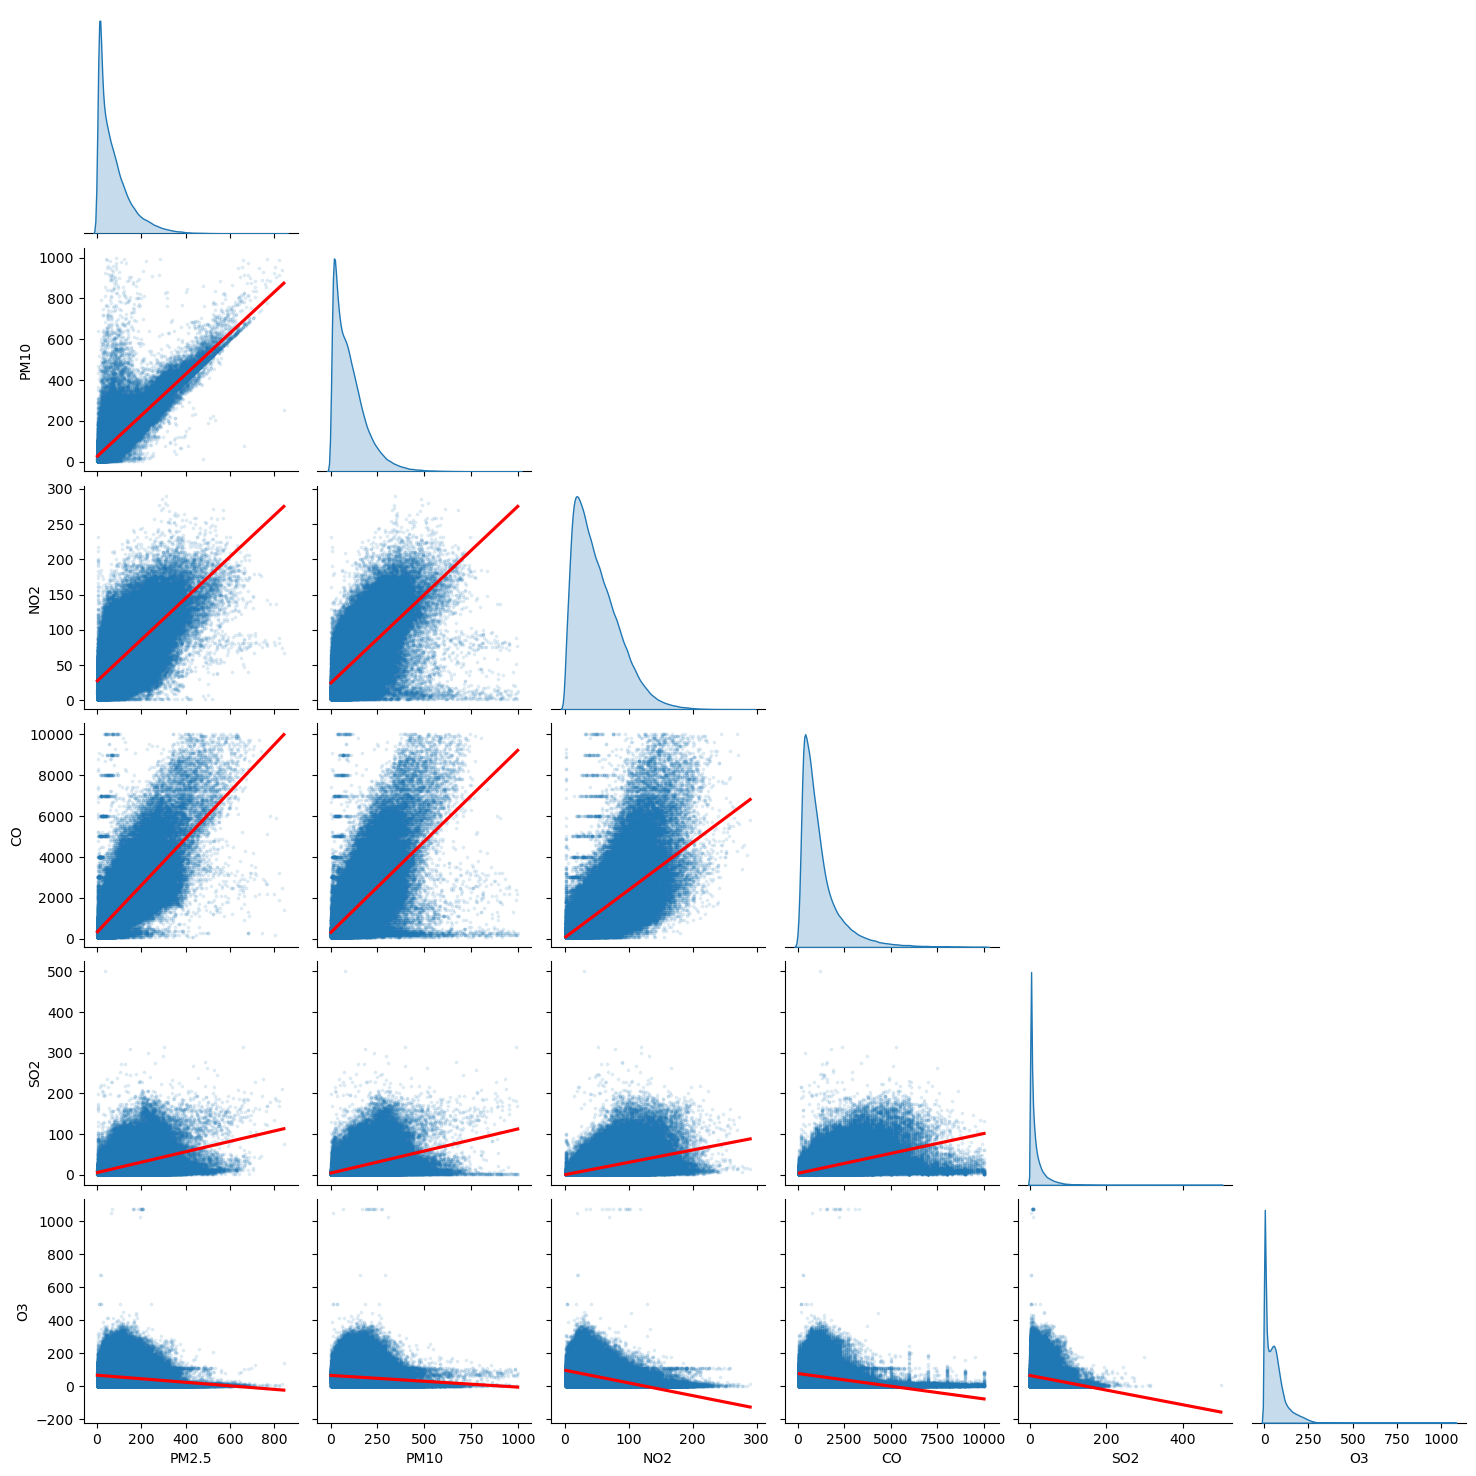

In [9]:
sns.pairplot(
    each_pollution, 
    kind='reg', 
    corner=True,
    diag_kind='kde',
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1, 's': 3}}
)
each_pollution.corr()